In [1]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

class ZeroR:
    def __init__(self):
        self.model = DummyClassifier(strategy='most_frequent')
    
    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)
    
    def predict(self, X_test):
        return self.model.predict(X_test)
    
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        report = classification_report(y_test, y_pred)
        print(report)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

data = pd.read_excel(r'\Users\isabe\OneDrive\Documenten\Master DDS\Thesis\A\Data\Final_data.xlsx')

# Define predictor variables and target variable
X = data[['needle_fear', 'HRV', 'nic_caf', 'prior_donor', 'gender']]
y = data['vasovagal_enc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate ZeroR classifier
zr = ZeroR()
zr.fit(X_train_scaled, y_train)

# Evaluation on training set
print("Performance measures for ZeroR classifier on the training dataset:")
zr.evaluate(X_train_scaled, y_train)

# Evaluation on test set
print("Performance measures for ZeroR classifier on the test dataset:")
zr.evaluate(X_test_scaled, y_test)


Performance measures for ZeroR classifier on the training dataset:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        34
           1       0.00      0.00      0.00        14

    accuracy                           0.71        48
   macro avg       0.35      0.50      0.41        48
weighted avg       0.50      0.71      0.59        48

Performance measures for ZeroR classifier on the test dataset:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       0.00      0.00      0.00         3

    accuracy                           0.75        12
   macro avg       0.38      0.50      0.43        12
weighted avg       0.56      0.75      0.64        12



Check if the ZeroR works

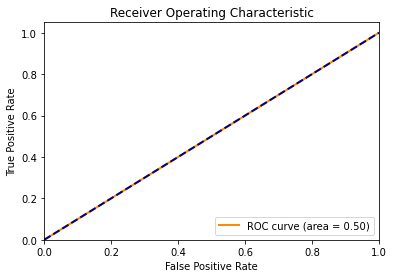

In [5]:
from sklearn.metrics import roc_curve, auc
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

# Train and evaluate ZeroR classifier
zr = DummyClassifier(strategy='most_frequent')
zr.fit(X_train_scaled, y_train)
y_pred_prob = zr.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
